## Comparing Different Edge Swaps

The motivation for this simulation is to compare the speed of two different implementations of degree preseving edge swaps under different conditions: when the number of nodes of the graph varies, when the number of swaps varies, and when the probability value of the graph varies

In [2]:
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from graspologic.utils import simple_edge_swap, simple_edge_swap_scipy

# Simulation 1: Times vs n_verts

1. Keep num_swaps=100 and p=0.3, but let N=[10, 100, 1000, 10000]
2. Loop over the values of N, make an ER graph with the value of N and p
3. Loop over num_swaps, and time how long it takes to do a DPES with both implementations
4. Plot the times for DPES vs the corresponding values of N

In [3]:
N = [10, 100, 1000, 10000]
num_swaps = 100
p = 0.3
n_verts = []
time_edge_swap = []
time_scipy_swap = []

In [4]:
#save times for simple edge swaps with varying n_verts and fixed num_swaps and p
for n in N:
    
    #make nxn matrix with p=0.3
    A = np.random.rand(n * n)
    A = [abs((int)(x+(1-p))-1) for x in A]
    A = np.array(A).reshape(n, n)
    
    for _ in range(num_swaps):    
        n_verts.append(n)
        
        #get time for doing simple edge swap on A
        start_time = timeit.default_timer()
        A = simple_edge_swap(A)
        elapsed_time_simple = timeit.default_timer() - start_time
        time_edge_swap.append(elapsed_time_simple)
        

In [5]:
#save times for scipy edge swaps with varying n_verts and fixed num_swaps and p
for n in N:
    
    #make nxn matrix with p=0.3
    A = np.random.rand(n * n)
    A = [abs((int)(x+(1-p))-1) for x in A]
    A = np.array(A).reshape(n, n)
    
    for _ in range(num_swaps):    
        
        #get time for doing scipy edge swap on A
        start_time = timeit.default_timer()
        A = simple_edge_swap_scipy(A)
        elapsed_time_scipy = timeit.default_timer() - start_time
        time_scipy_swap.append(elapsed_time_scipy)
        

In [6]:
time_simple_dict = {"time_simple_swap": time_edge_swap, "n_verts": n_verts}
df_simple_swap = pd.DataFrame(data = time_simple_dict)

In [7]:
time_scipy_dict = {"time_scipy_swap": time_scipy_swap, "n_verts": n_verts}
df_scipy_swap = pd.DataFrame(data = time_scipy_dict)

Text(0.5, 1.0, 'Times for swap vs n_verts')

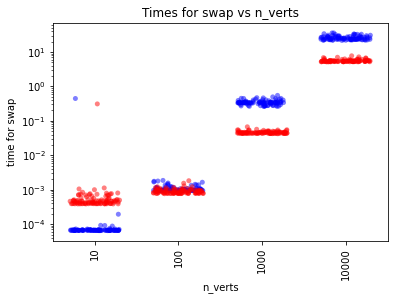

In [8]:
ax1 = sns.stripplot(data=df_simple_swap,
    x="n_verts",
    y="time_simple_swap",
    jitter = 0.3,
    alpha = 0.5,
    size=5,
    color='blue'
)

ax2 = sns.stripplot(data=df_scipy_swap,
    x="n_verts",
    y="time_scipy_swap",
    jitter = 0.3,
    alpha = 0.5,
    size=5,
    color= 'red'
)

ax1.set_yscale('log')
plt.xticks(rotation='vertical')
plt.xlabel('n_verts')
plt.ylabel('time for swap')
plt.title("Times for swap vs n_verts")

# Simulation 2: Times vs n_swaps

1. Keep N=100 and p=0.3, but let N=[10, 100, 1000, 10000]
2. Loop over the values of num_swaps, make an ER graph with the value of N and p
3. Loop over the value of num_swaps, and time how long it takes to do a DPES with both implementations
4. Plot the times for DPES vs the corresponding values of num_swaps

In [9]:
N = 100 
num_swaps = [10, 100, 1000, 10000]
p = 0.3
n_swaps = []
time_edge_swap = []
time_scipy_swap = []

In [10]:
#save times for simple edge swaps with varying n_verts and fixed num_swaps and p
for n in num_swaps:
    
    #make n=10 matrix with p=0.3
    A = np.random.rand(N * N)
    A = [abs((int)(x+(1-p))-1) for x in A]
    A = np.array(A).reshape(N, N)
    
    for _ in range(n):    
        n_swaps.append(n)
        
        #get time for doing simple edge swap on A
        start_time = timeit.default_timer()
        A = simple_edge_swap(A)
        elapsed_time_simple = timeit.default_timer() - start_time
        time_edge_swap.append(elapsed_time_simple)

In [11]:
#save times for scipy edge swaps with varying n_swaps and fixed num_verts and p
for n in num_swaps:
    
    #make n=10 matrix with p=0.3
    A = np.random.rand(N * N)
    A = [abs((int)(x+(1-p))-1) for x in A]
    A = np.array(A).reshape(N, N)
    
    for _ in range(n):
        
        #get time for doing scipy edge swap on A
        start_time = timeit.default_timer()
        A = simple_edge_swap_scipy(A)
        elapsed_time_simple = timeit.default_timer() - start_time
        time_scipy_swap.append(elapsed_time_simple)

In [12]:
time_simple_dict = {"time_simple_swap": time_edge_swap, "n_swaps": n_swaps}
df_simple_swap = pd.DataFrame(data = time_simple_dict)

In [13]:
time_scipy_dict = {"time_scipy_swap": time_scipy_swap, "n_swaps": n_swaps}
df_scipy_swap = pd.DataFrame(data = time_scipy_dict)

Text(0.5, 1.0, 'Times for swap vs n_swaps')

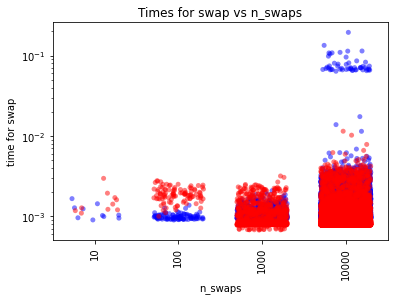

In [14]:
ax1 = sns.stripplot(data=df_simple_swap,
    x="n_swaps",
    y="time_simple_swap",
    jitter = 0.3,
    alpha = 0.5,
    size=5,
    color='blue'
)

ax2 = sns.stripplot(data=df_scipy_swap,
    x="n_swaps",
    y="time_scipy_swap",
    jitter = 0.3,
    alpha = 0.5,
    size=5,
    color= 'red'
)

ax1.set_yscale('log')
plt.xticks(rotation='vertical')
plt.xlabel('n_swaps')
plt.ylabel('time for swap')
plt.title("Times for swap vs n_swaps")

# Simulation 3: Times vs p

1. Keep N=100 and num_swaps=100, but let p=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
2. Loop over the values of p, make an ER graph with the value of N and p
3. Loop over the value of num_swaps, and time how long it takes to do a DPES with both implementations
4. Plot the times for DPES vs the corresponding values of p

In [15]:
N = 100 
num_swaps = 100 
prob_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
p_array = []
time_edge_swap = []
time_scipy_swap = []

In [16]:
#save times for simple edge swaps with varying p and fixed n_verts and fixed num_swaps
for p in prob_values:
    
    #make n=10 matrix with p=p
    A = np.random.rand(N * N)
    A = [abs((int)(x+(1-p))-1) for x in A]
    A = np.array(A).reshape(N, N)
    
    for _ in range(num_swaps):    
        p_array.append(p)
        
        #get time for doing simple edge swap on A
        start_time = timeit.default_timer()
        A = simple_edge_swap(A)
        elapsed_time_simple = timeit.default_timer() - start_time
        time_edge_swap.append(elapsed_time_simple)

In [17]:
#save times for scipy edge swaps with varying p and fixed n_verts and fixed num_swaps
for p in prob_values:
    
    #make n=10 matrix with p=p
    A = np.random.rand(N * N)
    A = [abs((int)(x+(1-p))-1) for x in A]
    A = np.array(A).reshape(N, N)
    
    for _ in range(num_swaps):    
        
        #get time for doing scipy edge swap on A
        start_time = timeit.default_timer()
        A = simple_edge_swap_scipy(A)
        elapsed_time_scipy = timeit.default_timer() - start_time
        time_scipy_swap.append(elapsed_time_scipy)

In [18]:
time_simple_dict = {"time_simple_swap": time_edge_swap, "p_array": p_array}
df_simple_swap = pd.DataFrame(data = time_simple_dict)

In [19]:
time_scipy_dict = {"time_scipy_swap": time_scipy_swap, "p_array": p_array}
df_scipy_swap = pd.DataFrame(data = time_scipy_dict)

Text(0.5, 1.0, 'Times for swap vs p')

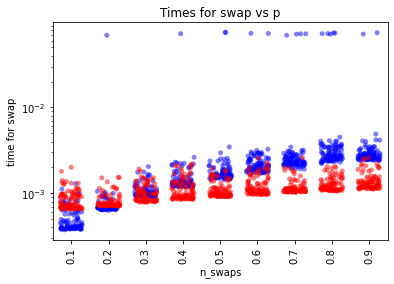

In [20]:
ax1 = sns.stripplot(data=df_simple_swap,
    x="p_array",
    y="time_simple_swap",
    jitter = 0.3,
    alpha = 0.5,
    size=5,
    color='blue'
)

ax2 = sns.stripplot(data=df_scipy_swap,
    x="p_array",
    y="time_scipy_swap",
    jitter = 0.3,
    alpha = 0.5,
    size=5,
    color= 'red'
)

ax1.set_yscale('log')
plt.xticks(rotation='vertical')
plt.xlabel('n_swaps')
plt.ylabel('time for swap')
plt.title("Times for swap vs p")